# Black Friday Sales Prediction

In [201]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [202]:
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [203]:
df_train.shape

(550068, 12)

In [204]:
## import the test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [205]:
df=df_train.append(df_test)
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14112\2683340988.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [207]:
df.drop('User_ID',axis=1,inplace=True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [209]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [210]:
# Categorical feature to umerical conversion 
df.Gender=df.Gender.map({'F':0,'M':1})

In [211]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [212]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [213]:
df.Age=df.Age.map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 71.7+ MB


In [215]:
'''# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])
  
df['species'].unique()'''

"# Import label encoder\nfrom sklearn import preprocessing\n  \n# label_encoder object knows \n# how to understand word labels.\nlabel_encoder = preprocessing.LabelEncoder()\n  \n# Encode labels in column 'species'.\ndf['species']= label_encoder.fit_transform(df['species'])\n  \ndf['species'].unique()"

In [216]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [217]:
## Fixing categorical City_ctegory
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [218]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [219]:
df=pd.concat([df,df_city],axis=1)

In [220]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [221]:
df.drop('City_Category',axis=1,inplace=True)

In [222]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


## Missing values

In [223]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [224]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [225]:
## Replace the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [226]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


In [227]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [228]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [229]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\DELL\AppData\Local\Temp\ipykernel_14112\2063355665.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [230]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [231]:
#Convert object into integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)


In [232]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [233]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

In [234]:
df.drop('Product_ID',axis=1,inplace=True)

In [235]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='Purchase'>

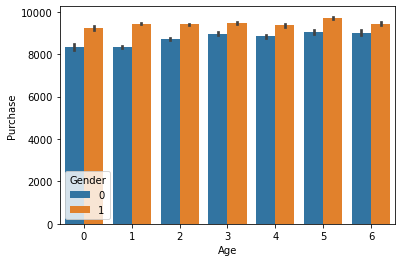

In [236]:
### Visualisation
sns.barplot('Age','Purchase',hue='Gender',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

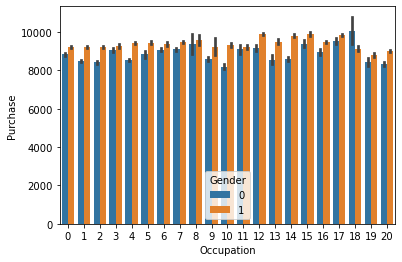

In [237]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

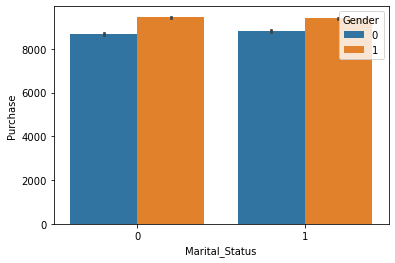

In [238]:
sns.barplot('Marital_Status','Purchase',hue='Gender',data=df)

In [239]:
pd.crosstab(df['Marital_Status'],df['Gender'])

Gender,0,1
Marital_Status,,
0,112469,350069
1,81167,239962


In [240]:
### Feature scaling
df_test=df[df['Purchase'].isnull()]


In [241]:
df_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,0,2,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,2,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,2,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,4,1,4,0,10,16.0,16.0,NaN,0,1


In [242]:
df_train=df[~df['Purchase'].isnull()]

In [243]:
df_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,8.0,16.0,368.0,1,0
550064,0,2,1,3,0,20,8.0,16.0,371.0,0,1
550065,0,2,15,4,1,20,8.0,16.0,137.0,1,0
550066,0,6,1,2,0,20,8.0,16.0,365.0,0,1


In [244]:
X=df_train.drop('Purchase',axis=1)

In [249]:
X.shape

(550068, 10)

In [247]:
y=df_train['Purchase']

In [250]:
X.shape

(550068, 10)

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [254]:
df_train.drop('Purchase',axis=1,inplace=True)
df_test.drop('Purchase',axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14112\2261737455.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_14112\2261737455.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [257]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train)


[[ 0.57141282 -1.10505734  0.90867822 ...  0.36891877  1.17569512
  -0.67282374]
 [ 0.57141282  1.84716932 -1.23820419 ...  0.36891877 -0.85056064
  -0.67282374]
 [ 0.57141282  0.37105599  1.36872445 ... -1.09182956 -0.85056064
   1.48627336]
 ...
 [-1.75004823 -1.10505734 -1.08485545 ...  0.36891877  1.17569512
  -0.67282374]
 [-1.75004823 -1.10505734 -0.62480922 ...  0.36891877  1.17569512
  -0.67282374]
 [-1.75004823 -1.10505734 -0.93150671 ...  0.36891877 -0.85056064
  -0.67282374]]


In [258]:
print(X_test)

[[ 0.57491817  1.85432241  1.67314502 ...  0.36853635 -0.85317164
   1.490841  ]
 [-1.73937798  0.37396835  0.44724923 ...  0.36853635  1.1720971
  -0.67076234]
 [-1.73937798  0.37396835 -1.23835749 ...  0.36853635 -0.85317164
  -0.67076234]
 ...
 [ 0.57491817 -1.10638572 -0.93188354 ...  0.36853635 -0.85317164
   1.490841  ]
 [ 0.57491817  0.37396835 -0.16569867 ...  0.00396261 -0.85317164
   1.490841  ]
 [ 0.57491817 -1.10638572 -0.62540959 ...  0.36853635  1.1720971
  -0.67076234]]
